In [32]:
%%javascript
function getQueryStringValue (key){  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("docID='".concat(getQueryStringValue("docID")).concat("'"));

<IPython.core.display.Javascript object>

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import urllib.request, json
import urllib
import helpers
from datetime import datetime, date, time
from ipywidgets import widgets  
from IPython import get_ipython
from IPython.display import display
from matplotlib import pylab
from pylab import *
from IPython.display import clear_output
import warnings

# Select Notebook Data:

In [34]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#construct url from variable
cinergi_url = "http://cinergi.sdsc.edu/geoportal/rest/metadata/item/" + docID

#Create dropdown Buttons and generate table
data_dropdown_options = helpers.create_dropdown_data (cinergi_url)
#Create widget with dropdown options from list created above
def f(notebooks_menu):
    return notebooks_menu
# out = interact(f, notebooks_menu=nb_menu);
out = interact(f, notebooks_menu=data_dropdown_options.keys());
warnings.simplefilter('ignore')

interactive(children=(Dropdown(description='notebooks_menu', options=('0. https://nwis.waterdata.usgs.gov/usa/…

# Prepare Data:

In [35]:
#file = 'https://nwis.waterdata.usgs.gov/usa/nwis/qwdata/?site_no=07373420&agency_cd=USGS&inventory_output=0&rdb_inventory_output=file&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&qw_attributes=0&format=rdb&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=value&submitted_form=brief_list'
file = data_dropdown_options[out.widget.result]
print(file)
print('Downloading the dataset. Please wait...')

data = urllib.request.urlopen(file) # it's a file like object and works just like a file

skipVal = 0
for line in data:
    strline = str(line)
    #print(strline)
    if '#' in strline:
        pass
    else:
        break
    skipVal = skipVal + 1
    
global df
df = pd.read_csv(file, sep='\t',skiprows=range(0, skipVal),encoding='utf-8')
df = df.drop(df.index[0])

https://nwis.waterdata.usgs.gov/usa/nwis/qwdata/?site_no=07374510&agency_cd=USGS&inventory_output=0&rdb_inventory_output=file&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&qw_attributes=0&format=rdb&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=value&submitted_form=brief_list


In [36]:
df.iloc[0]
pd.DataFrame(df.count()).transpose().style
df['sample_dt'] =  pd.to_datetime(df['sample_dt'], format='%Y-%m-%d', errors='ignore')
display("Number of variables in each column",pd.DataFrame(df.count()).transpose().style)

#Create table of parameter definitions
url = 'f1'
data = pd.read_csv(url, sep='\t',skiprows=range(0, 6),header = [1],encoding='utf-8')
data = data.drop(data.index[0])
for i in ['f2','f3','f4','f5','f6','f7']:
    temp_data = pd.read_csv(i,sep='\t',header = None, encoding='utf-8')
    temp_data.columns = data.columns.values
    data = pd.concat([data,temp_data],ignore_index = True)
    
data['parm_cd'] = data['parm_cd'].astype('str') 
data['parm_nm'] = data['parm_nm'].astype('str') 

'Number of variables in each column'

,agency_cd,site_no,sample_dt,sample_tm,sample_end_dt,sample_end_tm,sample_start_time_datum_cd,tm_datum_rlbty_cd,coll_ent_cd,medium_cd,tu_id,body_part_id,p00028,p00080,p00191,p00400,p00405,p00440,p00445,p00620,p00650,p00902,p00916,p00927,p00933,p00940,p00945,p00951,p00955,p70300,p70303,p71850,p71885,p90095
0,5,5,5,0,0,0,5,5,5,5,0,0,5,2,5,5,5,5,5,4,1,4,4,4,4,5,4,4,4,3,3,4,2,5


# Graph Data:

Dropdown(description='Number:', options=('Choose Variable', 'p00028 18    Agency analyzing sample, code\nName:…

TypeError: nan is not a string

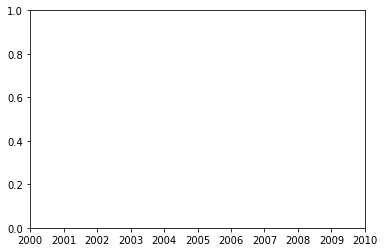

In [37]:
column_values = df.columns.values[12:]
for index,value in enumerate(column_values):
    column_values[index] = "%s %s"%(column_values[index], data['parm_nm'][data['parm_cd'] == value[1:]])
column_values = np.insert(column_values,0,'Choose Variable')
column_values


w = widgets.Dropdown(
    options=column_values,
    description='Number:',
    disabled=False,
    value = "Choose Variable"
)

#Describe what happens when the button changes its value
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        try:
            df.sort_values('sample_dt', ascending=True)
            plt.plot(df['sample_dt'], df[change['new'][0:6]])
            xlabel('Time(years)')
            title(change['new'])
        except ValueError:
            print('The column contains a Non-Integer Value! Nothing Can be Displayed!')


w.observe(on_change)
display(w)